# Scatterplot e regplot: relações entre variáveis numéricas

No capítulo anterior, vimos como utilizar o pointplot, uma ferramenta flexível que pode ser usada para comparar distribuições de variáveis categóricas distintas, ou para evidenciar transições no tempo. Nesta aula, vamos continuar trabalhando com a mesma geometria: o ponto. No entanto, nos gráficos que veremos neste capítulo, pontos são utilizados para representar relações entre duas variáveis numéricas. Além disso, nesta aula começaremos a entender como fazer anotações em um gráfico.

## Scatterplot e regplot

Antes de iniciarmos a análise com os novos gráficos que vamos utilizar neste capítulo, precisamos, como sempre, carregar as bibliotecas de que vamos precisar: a biblioteca `pandas`, o módulo `pyplot` da biblioteca `matplotlib` e a biblioteca `seaborn`.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Em seguida baixamos os dados. Nesta aula vamos utilizar novamente a base de dados do IDH. Queremos utilizar, principalmente, os dados de 2022, mas, ao invés de acessar diretamente a base de 2022, vamos relembrar como podemos utilizar o método `.query` para filtrar nossos dados. Basta selecionar as linhas em que o valor da coluna ano é 2022.

In [2]:
idh = pd.read_csv("https://bit.ly/idh_tidy")

idh_2022 = idh.query("ano == 2022")

idh_2022.head()

,sigla,pais,grupo_idh,regiao,ranking_idh,ano,idh,idh_ev,idh_ee,idh_me,...,gdi_ev_m,gdi_ee_m,gdi_me_m,gdi_rpc_m,extra_ap_f,extra_ap_m,extra_ft_f,extra_ft_m,extra_co2,extra_pop
6240,AFG,Afeganistão,Baixo,Ásia do Sul,182.0,2022,0.462,62.879,10.705385,2.514790,...,59.766,13.228449,3.912740,2256.217507,27.215190,72.784810,23.33,77.09,0.306318,41.128771
6241,ALB,Albânia,Alto,Europa e Ásia Central,74.0,2022,0.789,76.833,14.487470,10.121144,...,74.502,14.292200,10.433855,17398.003690,35.714286,64.285714,56.08,69.91,1.717758,2.842321
6242,DZA,Argélia,Alto,Países Árabes,93.0,2022,0.745,77.129,15.487880,6.987444,...,75.853,14.743880,7.481537,17858.790780,7.005254,92.994746,17.57,65.53,4.079540,44.903225
6243,AND,Andorra,Muito Alto,NaN,35.0,2022,0.884,83.552,12.783780,11.613440,...,81.430,12.810630,11.704380,NaN,46.428571,53.571429,NaN,NaN,4.593593,0.079824
6244,AGO,Angola,Mediano,África Sub-sahariana,150.0,2022,0.591,61.929,12.167600,5.844292,...,59.351,12.909900,7.187960,5973.845631,33.636364,66.363636,74.73,78.16,0.507359,35.588987


Pronto, agora que temos a nossa base com os dados do IDH de 194 países em 2022, vamos explorar como podemos utilizar as funções `scatterplot` e `regplot` da biblioteca `seaborn` para entender a relação entre 2 variáveis numéricas.

### Scatterplot

Vamos começar com a função `scatterplot`. Nesse gráfico, a posição de cada ponto é dada por duas coordenadas numéricas, uma referente à variável representada no eixo Y, a outra referente à variável representada no eixo X. Sendo assim, para utilizar essa função precisamos de duas variáveis numéricas, uma para o eixo Y e outra para o eixo X. Vamos analisar aqui a relação entre expectativa de vida (coluna `"idh_ev"` na nossa base) e expectativa de escolaridade (coluna `"idh_ee"` na nossa base) dos países.

A primeira coisa que já podemos nos perguntar é qual variável devemos representar em qual eixo. Evidentemente, do ponto de vista técnico é possível fazer o gráfico dos dois jeitos, tanto colocando a expectativa de vida no eixo Y e a expectativa de escolaridade no eixo X, como invertendo as variáveis (afinal as duas são do mesmo tipo).

No entanto, quando utilizamos esse tipo de gráfico é bom lembrar que temos uma convenção bastante consolidada que pode ser interessante seguir. Em geral, se supomos que uma variável explica o comportamento de outra, é mais comum representarmos no eixo Y a variável que está sendo explicada (chamada de variável dependente, ou variável de resposta), e no eixo X a variável que estamos utilizando como fator explicativo no eixo X (chamada de variável independente ou explicativa). Nesse caso, qual é a nossa hipótese inicial sobre a relação entre a expectativa de vida e a expectativa de escolaridade? Achamos que a expectativa de vida é afetada pela expectativa de escolaridade, ou que a expectativa de escolaridade é afetada pela expectativa de vida?

Ambas as hipóteses parecem razoáveis. No entanto, vamos supor inicialmente que a expectativa de escolaridade afeta a expectativa de vida positivamente. Ou seja, em uma sociedade em que o nível de educação esperado é maior, os indivíduos vivem mais, porque trabalham em atividades menos arriscadas, porque possuem mais renda e tem mais acesso a cuidados médicos, ou por outros fatores quaisquer. Em uma análise exploratória como a que estamos fazendo aqui, não é necessário partir de um modelo teórico muito detalhado a respeito da relação entre as variáveis, podemos apenas ter uma suposição razoável que queremos testar. Vale dizer, no entanto, que isso nem sempre é verdade: dependendo do nível de rigor e do tipo de conclusão que queremos em nossa análise, pode ser necessário partir de um modelo teórico mais robusto antes realizar qualquer teste com os dados.

O código a seguir cria um gráfico do tipo scatterplot com a expetativa de vida (`"idh_ev"`) no eixo Y e a expectativa de escolaridade (`"idh_ee"`) no eixo X. Antes de seguir com a sua leitura, observe o gráfico atentamente e tente entender qual tipo de relação entre essas variáveis é evidenciada nesse gráfico. O gráfico parece confirmar nossa suposição inicial?

<Axes: xlabel='idh_ee', ylabel='idh_ev'>

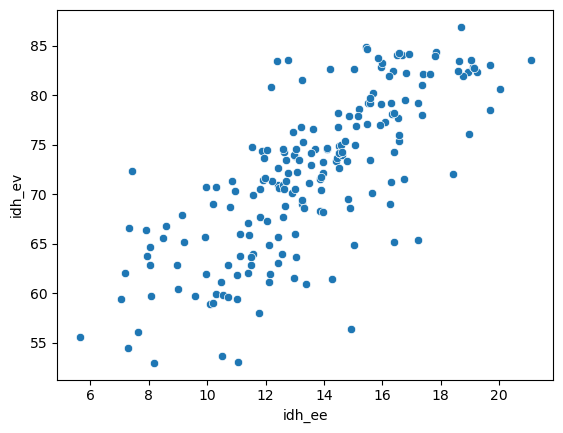

In [3]:
sns.scatterplot(x="idh_ee", y="idh_ev", data=idh_2022)

Se você identificou que o gráfico mostra uma relação positiva entre as variáveis, aparentemente confirmando a nossa suposição inicial, parabéns! De fato os dados mostram que países com maior taxa de escolaridade de fato tendem a apresentar uma expectativa de vida mais elevada.

Percebemos isso porque os pontos no gráfico estão dispostos de forma a seguir uma diagonal crescente, do canto inferior esquerdo (perto da origem dos eixos), em direção ao canto superior direito (valores mais altos de ambos os eixos). Isso é o mesmo que afirmar que, à medida que nos deslocamos para a direita no gráfico aumentando o valor da expectativa de escolaridade, os valores da expectativa de vida tendem a ser mais elevados (para cima no eixo Y).

#### Correlação vs. Causalidade

Aqui uma importante ressalva é necessária. O gráfico nos mostra uma relação simples entre duas variáveis: a expectativa de escolaridade e a expectativa de vida. Em nossa análise pressupomos que a expectativa de escolaridade poderia ser um fator explicador da expectativa de vida e os dados parecem confirmar essa suposição. No entanto, aqui é necessário ter muito cuidado, pois a análise ainda nos fornece muito pouca evidência sobre como essas variáveis se relacionam no mundo real.

Os gráficos que veremos neste capítulo, tanto o scatterplot como o regplot, fornecem uma visualização dos dados que nos permite identificar potenciais correlações entre as variáveis. Como vimos nesse gráfico: parece haver uma correlação positiva relativamente forte entre a expectativa de escolaridade e a expectativa de vida. No entanto, não podemos daí extrair conclusões precipitadas acerca de uma relação de causalidade entre essas variáveis. Uma hipótese seria, supor que um aumento da expectativa de escolaridade da população causa um aumento da expectativa de vida daquela mesma população.

No entanto, isso é apenas uma das explicações possíveis para o resultado que encontramos. Pode ser que, na verdade, seja o aumento da expectativa de vida da população que leva a um aumento do tempo dedicado aos estudos, e não o contrário. Outra possibilidade é que exista uma terceira variável, que não está sendo analisada nesse gráfico, que cause tanto o aumento de expectativa de escolaridade quanto o aumento da expectativa de vida (o nível de riqueza do país, por exemplo). Por fim, há ainda a possibilidade de que a correlação seja uma mera obra do acaso, não existindo realmente nenhuma relação real entre os dados (o que chamamos de uma "correlação espúria").

[Este site](https://www.tylervigen.com/spurious-correlations) mostra uma série de correlações espúrias desse tipo, entre variáveis que não têm, evidentemente, nenhuma relação real, apenas por um fator aleatório estão correlacionadas. Trata-se de um importante lembrete do cuidado que se deve ter ao supor relações reais entre variáveis correlacionadas.

### Regplot

Como vimos, nosso gráfico havia mostrado uma relação positiva linear entre as variáveis expectativa de escolaridade e expectativa de vida. Para destacar ainda mais essa relação, podemos traçar uma reta que mostra a tendência prevista nos dados. Queremos que essa reta se aproxime ao máximo dos dados reais que temos em nossa base, portanto ela deverá ser posicionada adotando alguma regra que minimize a sua distância dos pontos do gráfico.

O procedimento por meio do qual partimos de um conjunto de valores de 2 ou mais variáveis relacionadas para identificar uma reta que descreva o melhor possível essa relação, evidenciando a tendência dos dados, é chamado **regressão linear**. Não aprofundaremos aqui o significado matemático de uma regressão linear, vamos apenas tentar entender a sua interpretação geométrica: trata-se de uma reta que passa pelos dados simplificando a relação existente entre as variáveis. No nosso gráfico, a reta de regressão deve evidenciar a correlação positiva identificada anteriormente entre a expectativa de escolaridade e expectativa de vida.

A função `regplot` da biblioteca `seaborn` faz justamente isso. Ela nos dá praticamente o mesmo resultado da função `scatterplot`, mas inclui por padrão uma linha de regressão que busca descrever a tendência presente nos dados. Essa linha inclusive pode não ser uma reta, mas a opção padrão é a criação de uma reta. Observe o código abaixo, que reproduz o gráfico anterior, mas utiliza a função `regplot`, ao invés da função `scatterplot`.

<Axes: xlabel='idh_ee', ylabel='idh_ev'>

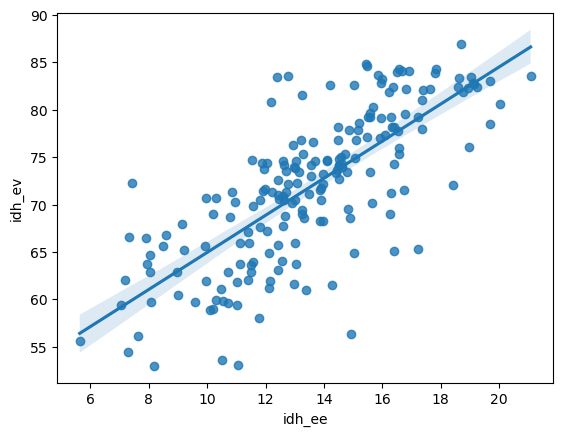

In [4]:
sns.regplot(x="idh_ee", y="idh_ev", data=idh_2022)

Vamos mexer um pouco nesse gráfico. Para facilitar a visualização da linha de tendência, vamos mudar a sua cor, por meio do argumento `line_kws`, que recebe um dicionário com características que queremos aplicar à linha. Vamos alterar a cor da linha (`"color"`) para vermelho (`"red"`). Além disso, vamos remover, por hora, a sombra que acompanha a linha, que é uma medida de intervalo de confiança da reta de regressão, igualando o argumento `ci` a `None`.

<Axes: xlabel='idh_ee', ylabel='idh_ev'>

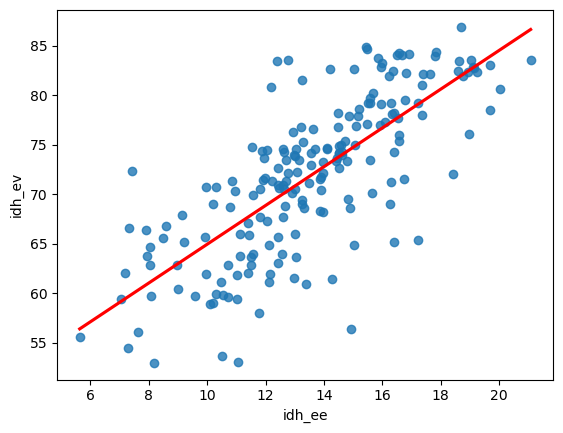

In [5]:
sns.regplot(
    x="idh_ee",
    y="idh_ev",
    ci=None,
    line_kws={"color": "red"},
    data=idh_2022
)

#### A reta de regressão como um 'modelo linear'

Com a reta de tendência, esse gráfico deixa ainda mais clara a relação que havíamos identificado anteriormente antre a expectativa de escolaridade e a expectativa de vida dos países. Essa reta e sua a equação podem ser entendidas também como um **'modelo linear'**, por meio do qual podemos estimar os valores da nossa variável de resposta (expectativa de vida) a partir de variáveis explicativas (nesse caso só temos uma: a expectativa de escolaridade). Assim, se tivermos o valor da expectativa de escolaridade de um novo país, mas não soubermos qual é a expetativa de vida naquele mesmo país, poderemos utilizar a reta que calculamos para estimar esse valor desconhecido.

Modelos lineares não são, evidentemente, os únicos modelos possíveis. Mas essa é uma ferramenta muito comum, por meio da qual podemos entender a relação entre variáveis e utilizá-las em estimativas. Outros modelos utilizam outras abordagens de cálculo, mas o seu objetivo é essencialmente o mesmo. Assim, quando você ouvir a expressão "modelo" referindo-se a modelagem matemática, estatística, econômica, etc., não se assuste. O modelo nada mais é do que uma ou mais equações matemáticas utilizadas para descrever relações entre variáveis e, a partir disso, fazer previsões ou estimativas.

#### Relações não lineares

Vamos agora analisar a relação entre a renda per capita (coluna `"idh_rpc"`) e a expectativa de vida (coluna `"idh_ev"`). Novamente a expectativa de vida será nossa variável de resposta (colocada no eixo y), ao passo que a renda per capita será nossa variável explicativa (colocada no eixo x).

O código abaixo mostra o scatterplot resultante do cruzamento dessas duas variáveis da nossa base.

<Axes: xlabel='idh_rpc', ylabel='idh_ev'>

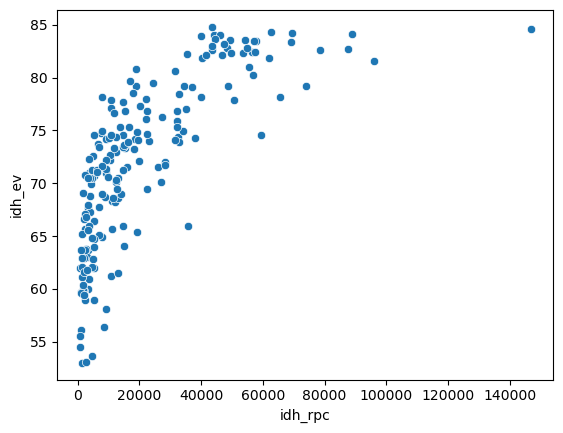

In [6]:
sns.scatterplot(x="idh_rpc", y="idh_ev", data=idh_2022)

Novamente a relação entre as variáveis evidenciada no gráfico é positiva: quanto maior a renda per capita, maior tende a ser a expectativa de vida naquele país. No entanto, a relação não parece ser linear, como no caso anterior. Se tentarmos traçar uma reta passando pelo gráfico, ela não cortará os dados de forma natural e proporcional, ela tenderá a se distanciar dos dados reais em uma região do gráfico. O código a seguir usa novamente a função regplot para adicionar uma linha de tendência, destacada em vermelho, ao nosso gráfico.

<Axes: xlabel='idh_rpc', ylabel='idh_ev'>

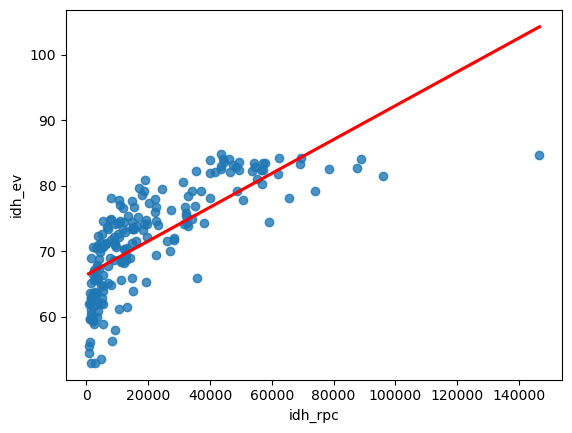

In [7]:
sns.regplot(
    x="idh_rpc",
    y="idh_ev",
    ci=None,
    line_kws={"color": "red"},
    data=idh_2022
)

Nesse caso, portanto, não parece ser adequado supor uma relação linear entre as variáveis. A relação entre os dados parece ser exponencial, então vamos utilizar uma regressão que supõe que a variável explicativa está em escala logarítmica ($y \sim \log(x)$), ao invés de uma regressão linear típica, para estimar a curva de tendência. 

Fazemos isso com o argumento `logx` da função `regplot`, como evidenciado no gráfico abaixo.

<Axes: xlabel='idh_rpc', ylabel='idh_ev'>

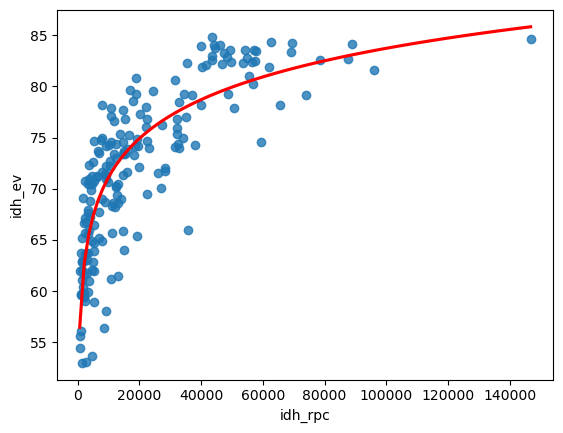

In [8]:
sns.regplot(
    x="idh_rpc",
    y="idh_ev",
    ci=None,
    logx=True,
    line_kws={"color": "red"},
    data=idh_2022
)

Não se preocupe com a relação matemática exata nesse caso. O objetivo desse exemplo é apenas mostrar que, se encontrarmos outras relações entre variáveis que não apenas a relação linear, a função `regplot` possui argumentos que nos permitem utilizar outras formas de estimar uma curva de tendência para a nossa análise. Uma introdução um pouco mais aprofundada a modelos será tema do curso de Ciência de Dados Jurídicos, no próximo semestre. Por hora, nosso objetivo é apenas mostrar como o scatterplot, com ou sem uma curva de tendência, pode ser uma ferramenta gráfica poderosa para mostrar a existência de relações entre variáveis numéricas.

## Introdução à prática de anotações nos dados

Vamos agora ver como podemos adicionar anotações aos nossos dados. Isso é particularmente útil quando utilizamos um scatterplot, porque com frequência queremos destacar dos dados alguns casos especiais. Neste exemplo, vamos destacar a posição do Brasil na nossa análise da relação entre expectativa de escolaridade e expectativa de vida. Nosso objetivo é destacar o ponto referente ao Brasil em uma cor diferente e adicionar um pequeno texto (anotação) ao gráfico indicando que aquele caso se trata do Brasil.

Para isso, vamos começar alterando a nossa base para incluir uma coluna que identifica qual país é o Brasil. Para isso vamos criar uma nova coluna, chamada `"is_br"`. Os valores dessa coluna serão o resultado uma operação lógica que retorna `True` apenas quando a coluna `"pais"` for igual a `"Brasil`.


In [9]:
idh_2022["is_br"] = idh_2022.pais == "Brasil"
idh_2022.head()

/var/folders/7d/zkftk23n0wggn2fg8_pzyh540000gn/T/ipykernel_87164/2085008322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idh_2022["is_br"] = idh_2022.pais == "Brasil"


,sigla,pais,grupo_idh,regiao,ranking_idh,ano,idh,idh_ev,idh_ee,idh_me,...,gdi_ee_m,gdi_me_m,gdi_rpc_m,extra_ap_f,extra_ap_m,extra_ft_f,extra_ft_m,extra_co2,extra_pop,is_br
6240,AFG,Afeganistão,Baixo,Ásia do Sul,182.0,2022,0.462,62.879,10.705385,2.514790,...,13.228449,3.912740,2256.217507,27.215190,72.784810,23.33,77.09,0.306318,41.128771,False
6241,ALB,Albânia,Alto,Europa e Ásia Central,74.0,2022,0.789,76.833,14.487470,10.121144,...,14.292200,10.433855,17398.003690,35.714286,64.285714,56.08,69.91,1.717758,2.842321,False
6242,DZA,Argélia,Alto,Países Árabes,93.0,2022,0.745,77.129,15.487880,6.987444,...,14.743880,7.481537,17858.790780,7.005254,92.994746,17.57,65.53,4.079540,44.903225,False
6243,AND,Andorra,Muito Alto,NaN,35.0,2022,0.884,83.552,12.783780,11.613440,...,12.810630,11.704380,NaN,46.428571,53.571429,NaN,NaN,4.593593,0.079824,False
6244,AGO,Angola,Mediano,África Sub-sahariana,150.0,2022,0.591,61.929,12.167600,5.844292,...,12.909900,7.187960,5973.845631,33.636364,66.363636,74.73,78.16,0.507359,35.588987,False


Agora podemos usar nossa coluna com o argumento `"hue"` da função `scatterplot` para diferenciar o Brasil com uma cor distinta, como mostra o código a seguir. Vamos atribuir o valor `False` ao argumento `legend` para esconder a legenda, já que o significado do destaque de cor que estamos utilizando ficará claro quando adicionarmos a anotação de texto ao gráfico. Além disso, vamos utilizar o argumento `palette` para determinar as cores que queremos usar em nosso gráfico.

<Axes: xlabel='idh_ee', ylabel='idh_ev'>

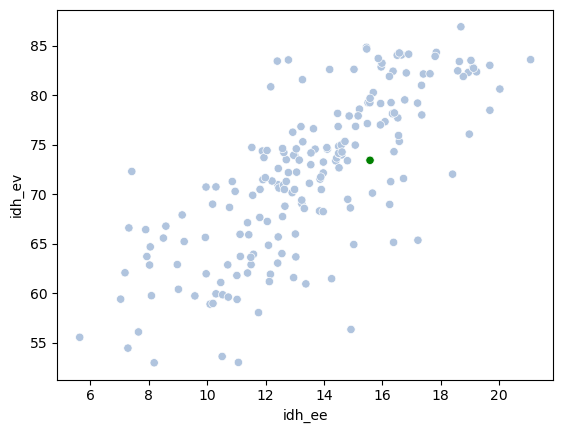

In [10]:
sns.scatterplot(
   x="idh_ee",
   y="idh_ev",
   hue="is_br",
   palette=["lightsteelblue", "green"],
   legend=False,
   data=idh_2022
)

Agora vamos à nossa anotação propriamente dita. Precisamos identificar a posição exata do nosso texto nas coordenadas do gráfico e, para isso, salvar os valores da expectativa de escolaridade e da expectativa de vida do Brasil em 2022 nas variáveis `x_position` e `y_position`, respectivamente.

Observe o código a seguir, que filtra a nossa base para selecinar o caso brasileiro e, em seguida, obtém salva os valores que precisamos utilizar em nossa anotação. Somamos pequenas alterações ao valor exato das variáveis (`0.2` e `0.5`, respectivamente) para que o texto não se sobreponha ao ponto a que se refere no gráfico. Esses valores foram obtidos por tentativa e erro, e devem ser ajustados para cada caso.

In [11]:
idh_2022_br = idh_2022.query("pais == 'Brasil'")

x_position = idh_2022_br["idh_ee"].values[0] + 0.2
y_position = idh_2022_br["idh_ev"].values[0] + 0.5

Pronto, agora podemos utilizar esses valores com a função `plt.text()`, da biblioteca `matplotlib`, que recebe ao menos três argumentos: a coordenada do eixo x, a coordenada do eixo y e o texto que queremos anotar em nosso gráfico. Nesse caso, vamos também controlar a cor do texto para seguir o valor que atribuímos ao ponto que indica a posição do Brasil. Observe o resultado do código abaixo.

Text(15.7788002, 73.925, 'BRA')

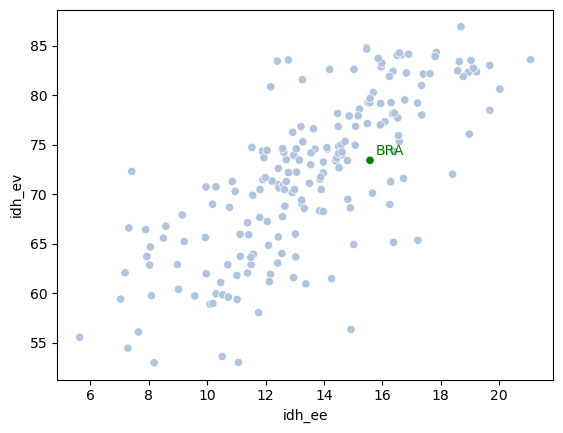

In [12]:
sns.scatterplot(
   x="idh_ee",
   y="idh_ev",
   hue="is_br",
   palette=["lightsteelblue", "green"],
   legend=False,
   data=idh_2022
)
plt.text(x=x_position, y=y_position, s="BRA", color="green")

Vamos agora finalizar este capítulo com o mesmo scatterplot anotado. Vamos apenas aplicar o que já sabemos para conferir um título ao gráfico, alterar os rótulos dos eixos e deixar o gráfico mais apresentável. Esse poderia ser um gráfico interessante para mostrar a relação entre duas variáveis importantes para o IDH e onde o Brasil se insere. 

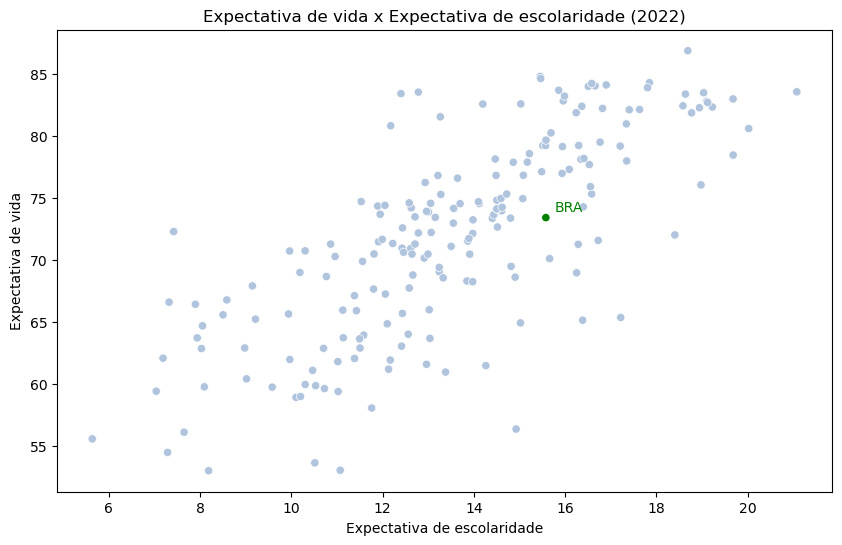

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(
   x="idh_ee",
   y="idh_ev",
   hue="is_br",
   palette=["lightsteelblue", "green"],
   legend=False,
   data=idh_2022,
   ax=ax
)

plt.text(x=x_position, y=y_position, s="BRA", color="green")

ax.set_title("Expectativa de vida x Expectativa de escolaridade (2022)")
ax.set_xlabel("Expectativa de escolaridade")
ax.set_ylabel("Expectativa de vida")

plt.show()